# LIBs

In [22]:
# Import Libraries
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Data Load

In [23]:
# Load Data
heart_df =  pd.read_csv("heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Preprocessing & EDA

In [24]:
# Data Info
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# No missing values

In [25]:
# Data Description
heart_df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
# The description reveals inconsistencies in the data, such as a minimum cholesterol value of 0 and negative values for oldpeak. These values are nonsensical and require investigation.

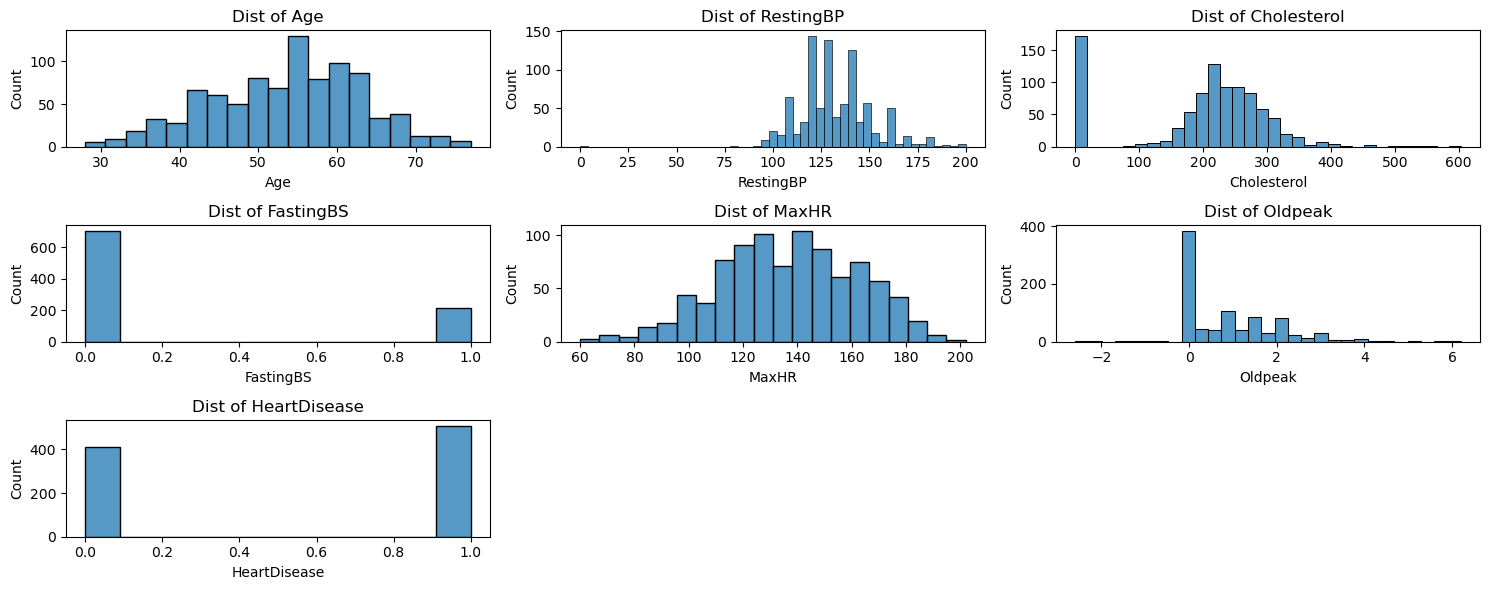

In [26]:
# Data Distribution
num_cols = heart_df.select_dtypes(include=["float64", "int64"])

fig , axs = plt.subplots(3,3, figsize=(15,6))
for idx, col in enumerate(num_cols.columns):
    ax = axs[idx // 3, idx % 3]
    sns.histplot(x=col, data=heart_df, ax=ax)
    ax.set_title(f"Dist of {col}")
axs[2,1].axis("off")
axs[2,2].axis("off")
plt.tight_layout()
plt.show()


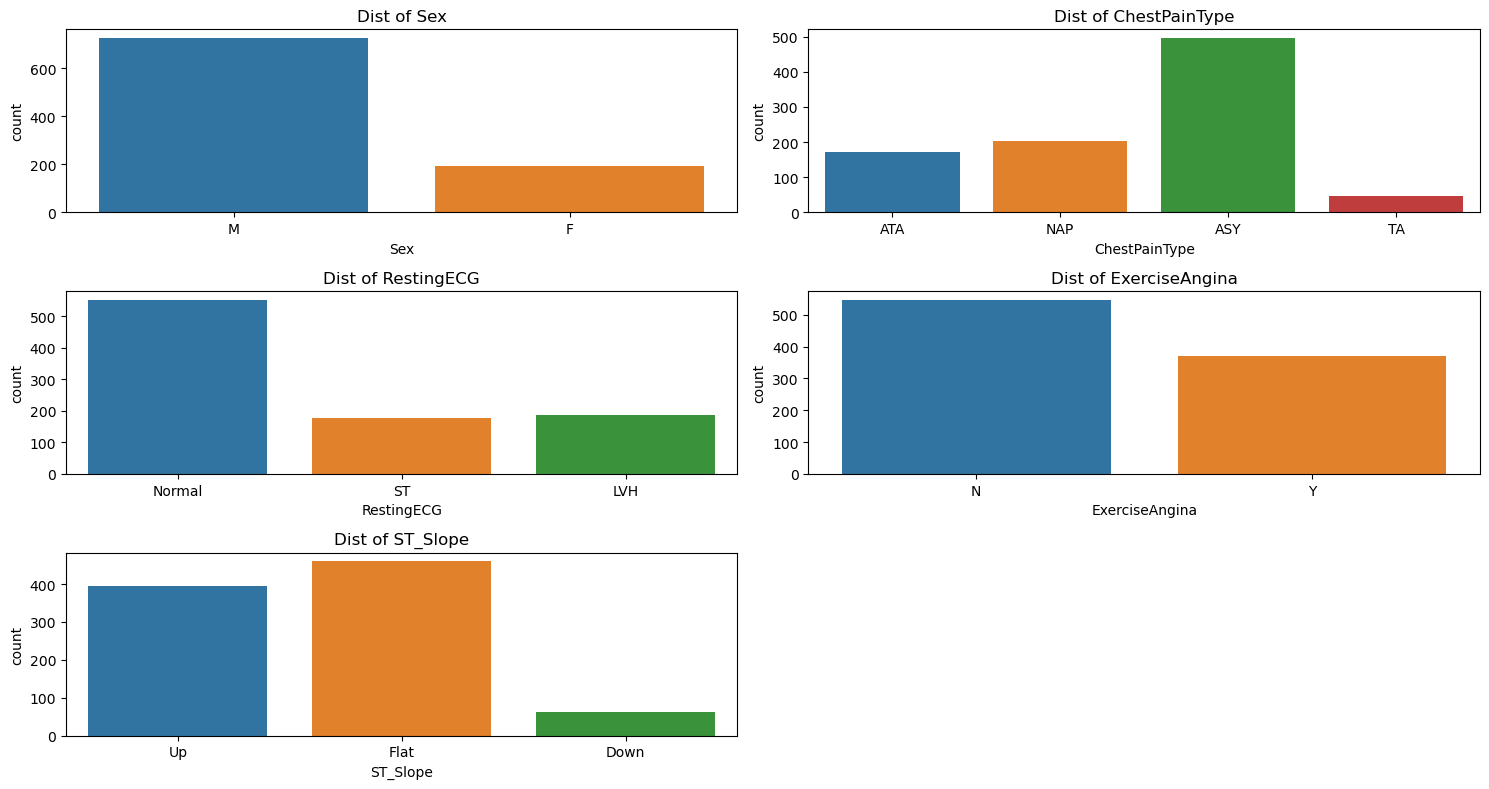

In [27]:
# Data Distribution
cat_cols = heart_df.select_dtypes(include=["object"])

fig , axs = plt.subplots(3,2, figsize=(15,8))
for idx, col in enumerate(cat_cols.columns):
    ax = axs[idx // 2, idx % 2]
    sns.countplot(x=col, data=heart_df, ax=ax)
    ax.set_title(f"Dist of {col}")
axs[2,1].axis("off")
plt.tight_layout()
plt.show()

In [28]:
# Missing Values
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [140]:
# Duplicates
heart_df.duplicated().sum()

0

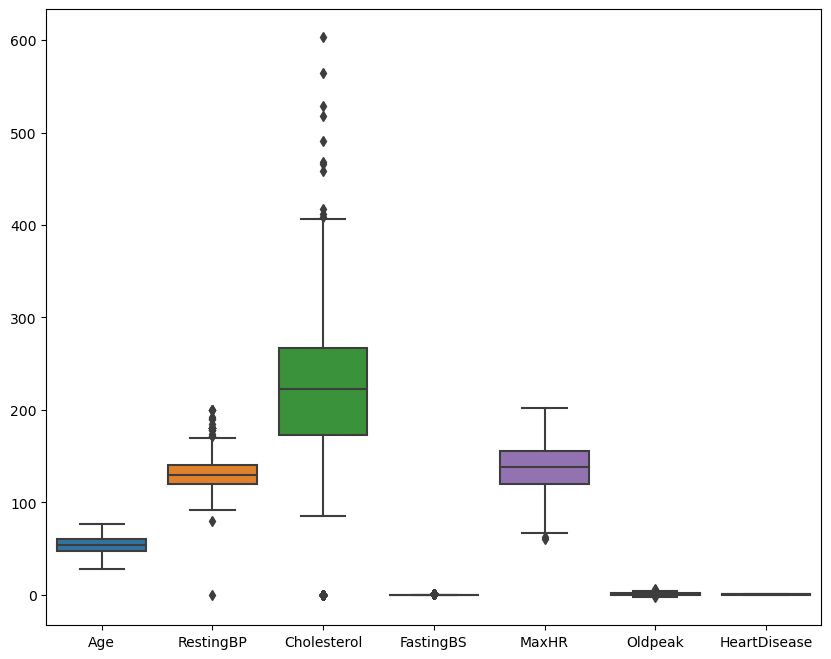

In [29]:
# Outliers
plt.figure(figsize=(10, 8))
sns.boxplot(heart_df)
plt.show()

In [30]:
print(f"Max cholesterol value : {heart_df.Cholesterol.max()}, Min cholesterol value {heart_df.Cholesterol.min()}")

Max cholesterol value : 603, Min cholesterol value 0


In [31]:
# Cholesterol Zero Values
zero_chol = heart_df[heart_df["Cholesterol"]==0]
zero_chol

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [32]:
# Drop zero Values
heart_df.drop(zero_chol.index, inplace=True)
heart_df.reset_index(inplace=True, drop=True)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.1+ KB


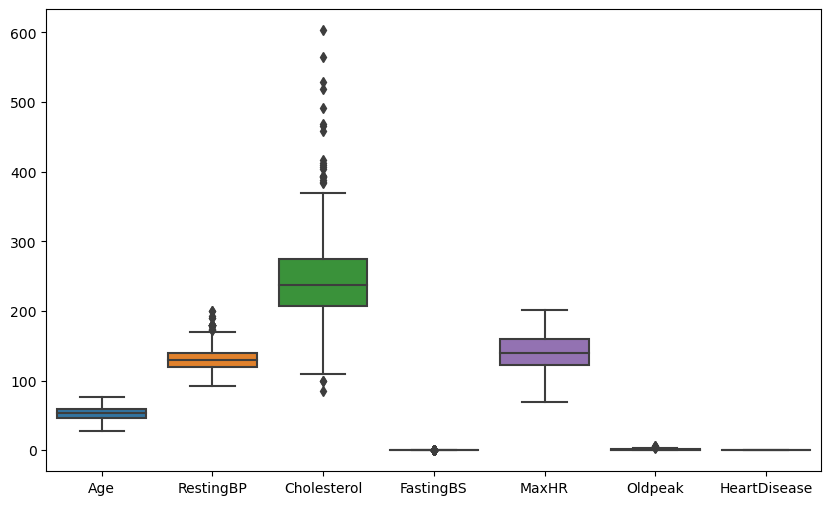

In [33]:
# Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(heart_df)
plt.show()

In [99]:
print(f"Max oldpeak value : {heart_df.Oldpeak.max()}, Min oldpeak value {heart_df.Oldpeak.min()}")

Max oldpeak value : 6.2, Min oldpeak value -0.1


In [34]:
# Oldpeak Negative Values
negative_oldpeak = heart_df[heart_df["Oldpeak"] < 0]
negative_oldpeak

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
345,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0


In [35]:
# Drop Negative Vales
heart_df.drop(negative_oldpeak.index, inplace=True)
heart_df.reset_index(inplace=True, drop=True)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             745 non-null    int64  
 1   Sex             745 non-null    object 
 2   ChestPainType   745 non-null    object 
 3   RestingBP       745 non-null    int64  
 4   Cholesterol     745 non-null    int64  
 5   FastingBS       745 non-null    int64  
 6   RestingECG      745 non-null    object 
 7   MaxHR           745 non-null    int64  
 8   ExerciseAngina  745 non-null    object 
 9   Oldpeak         745 non-null    float64
 10  ST_Slope        745 non-null    object 
 11  HeartDisease    745 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 70.0+ KB


c:\Users\mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


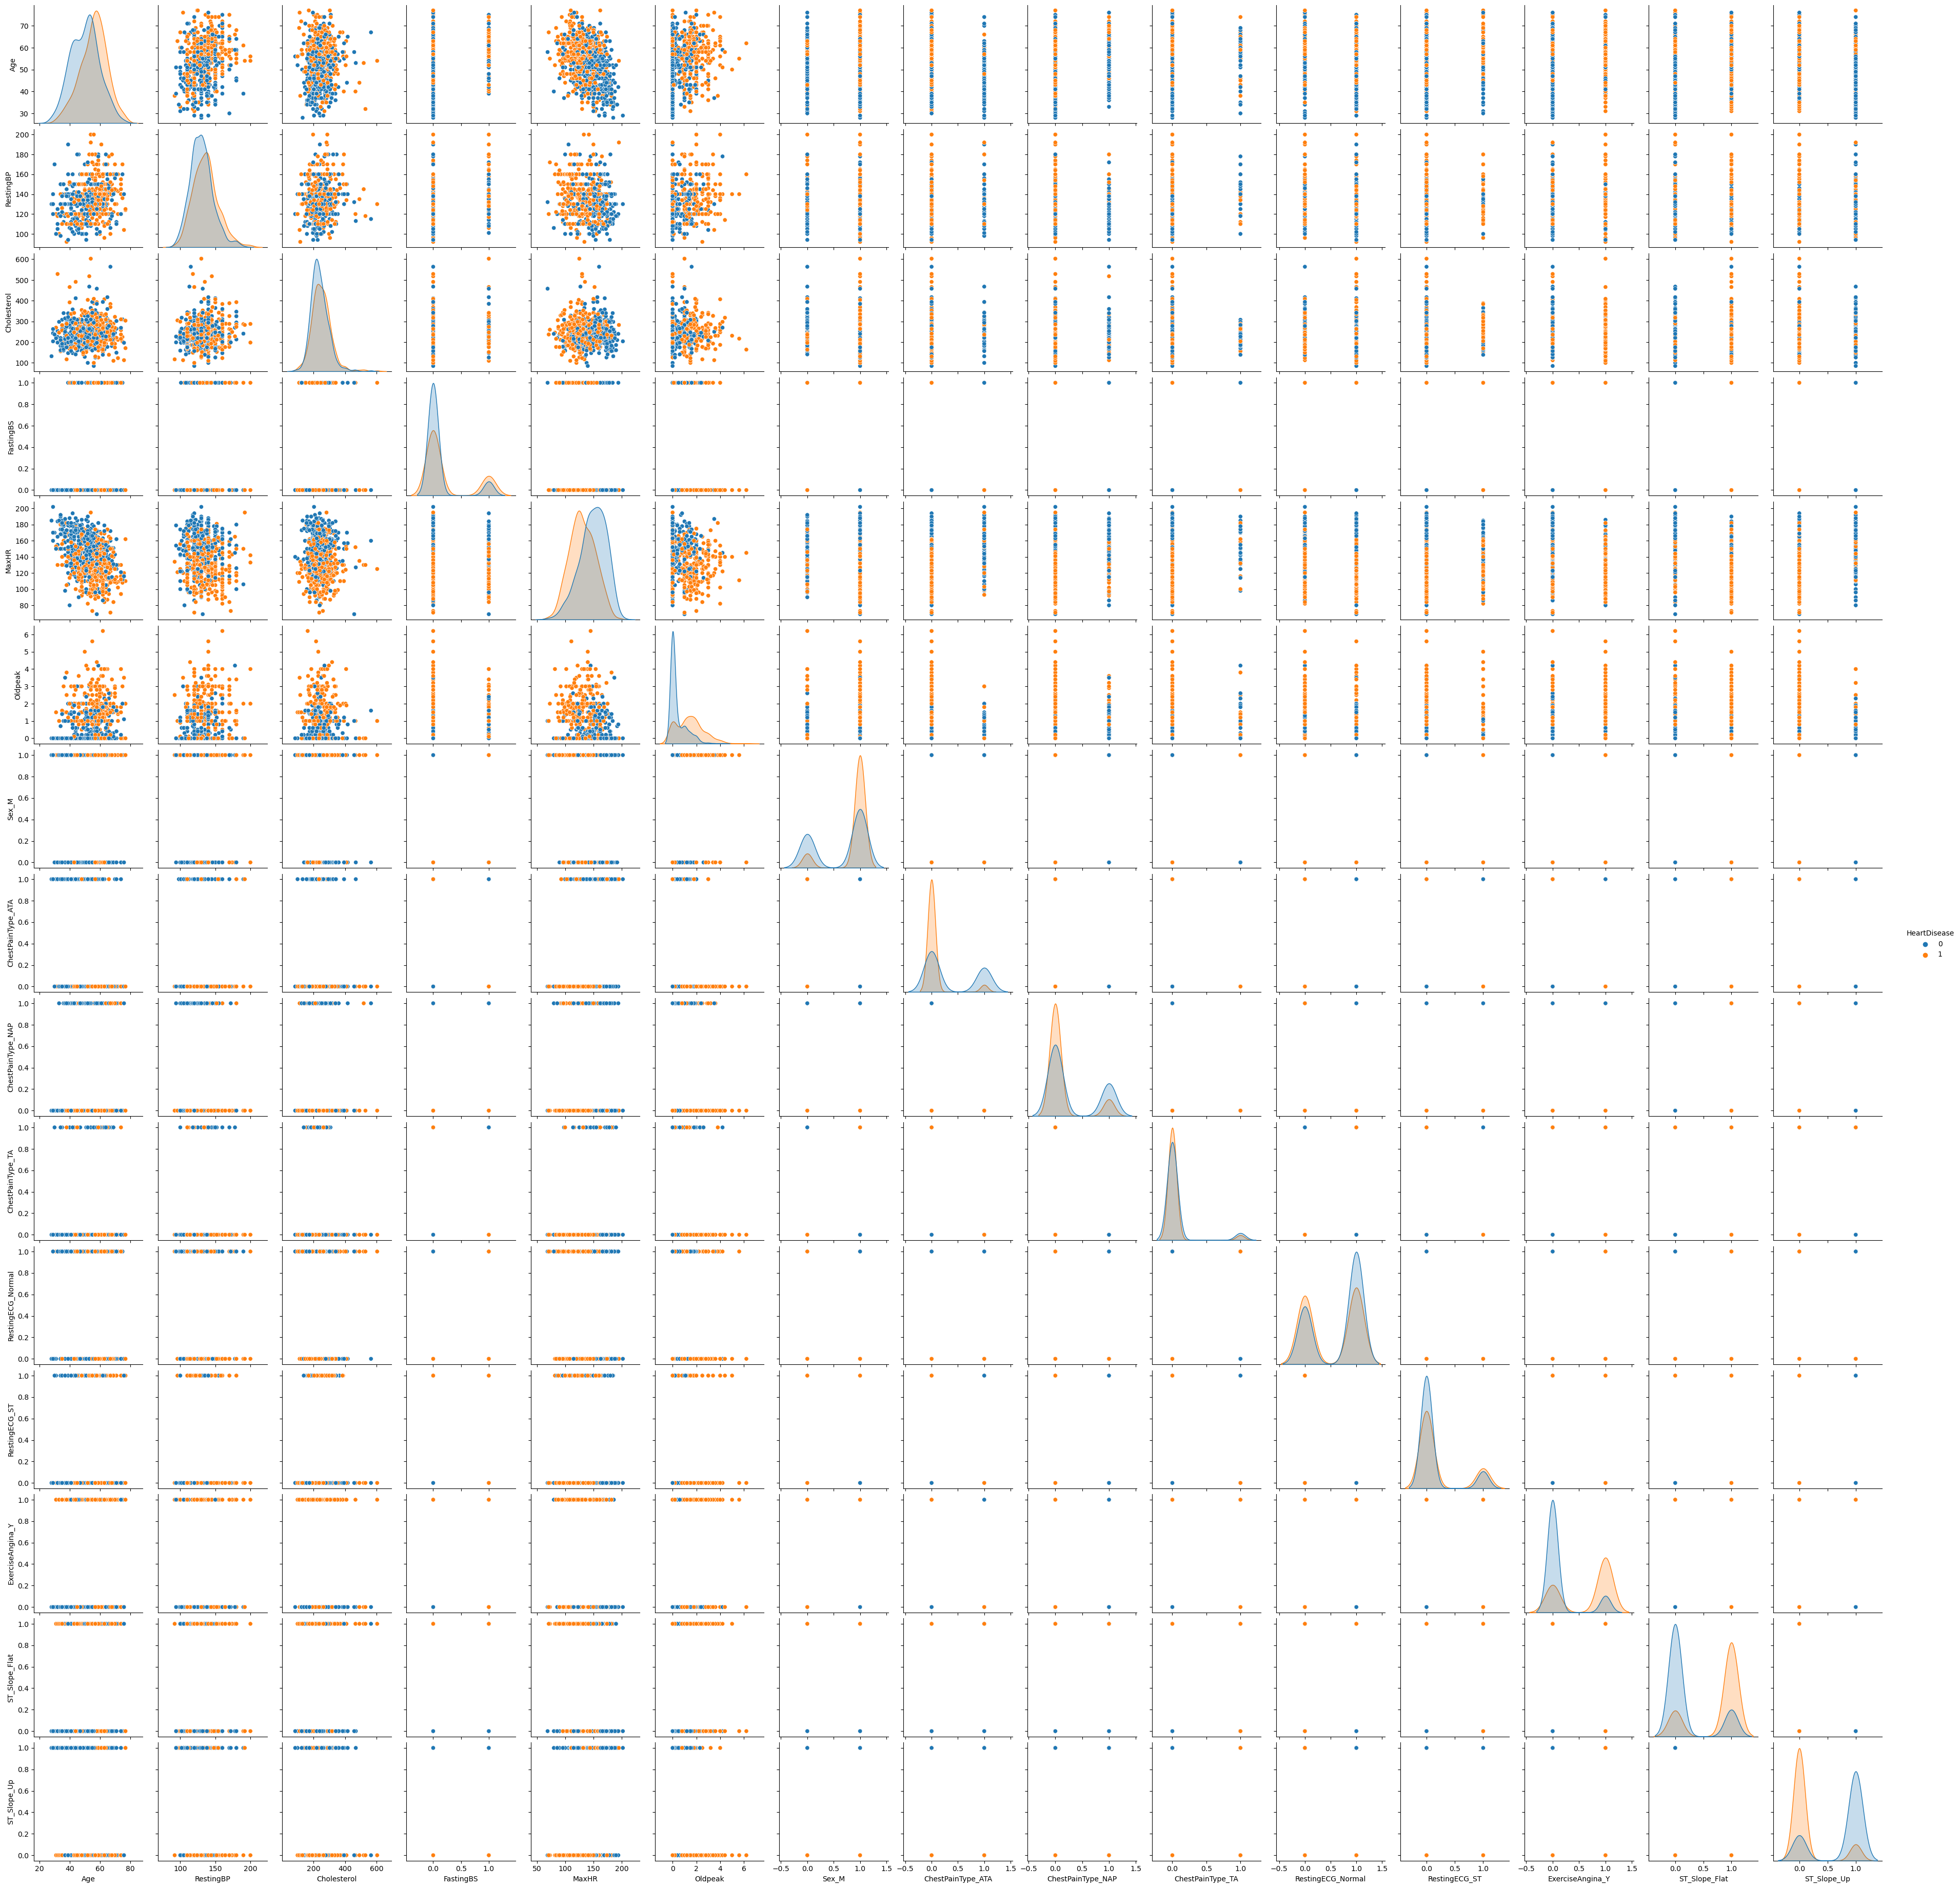

In [ ]:
# Data Pairplot
sns.pairplot(heart_df, hue="HeartDisease")
plt.show()

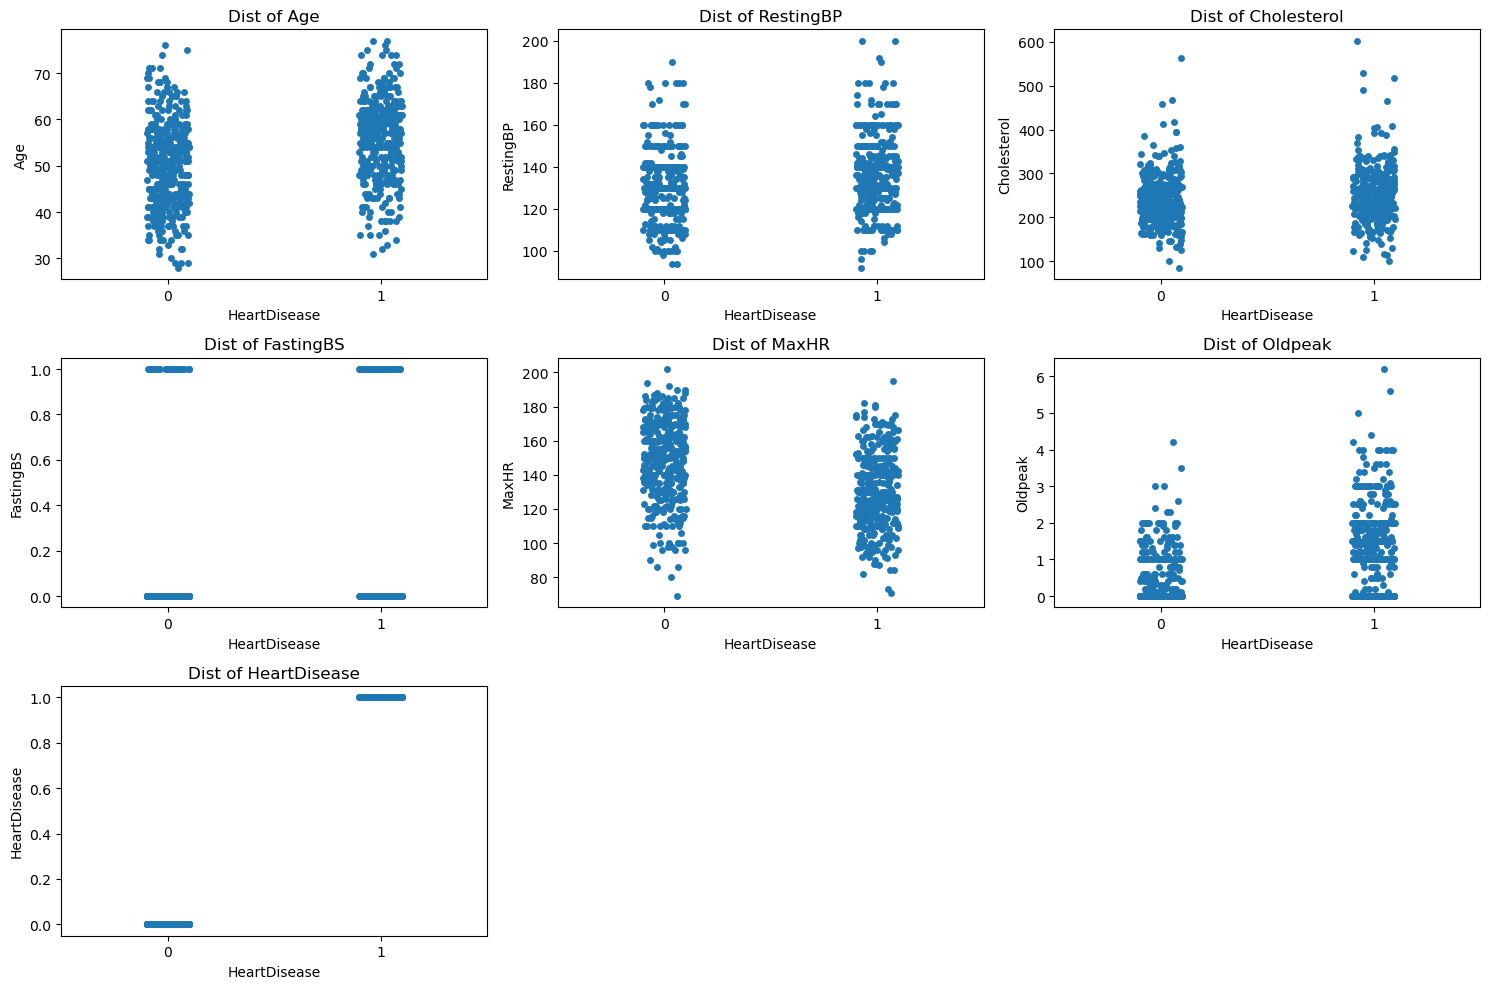

In [102]:
# Data Distribution With Target

fig , axs = plt.subplots(3,3, figsize=(15,10))
for idx, col in enumerate(num_cols):
    ax = axs[idx // 3, idx % 3]
    sns.stripplot(x="HeartDisease",y=col, data=heart_df, ax=ax)
    ax.set_title(f"Dist of {col}")
axs[2,1].axis("off")
axs[2,2].axis("off")
plt.tight_layout()
plt.show()


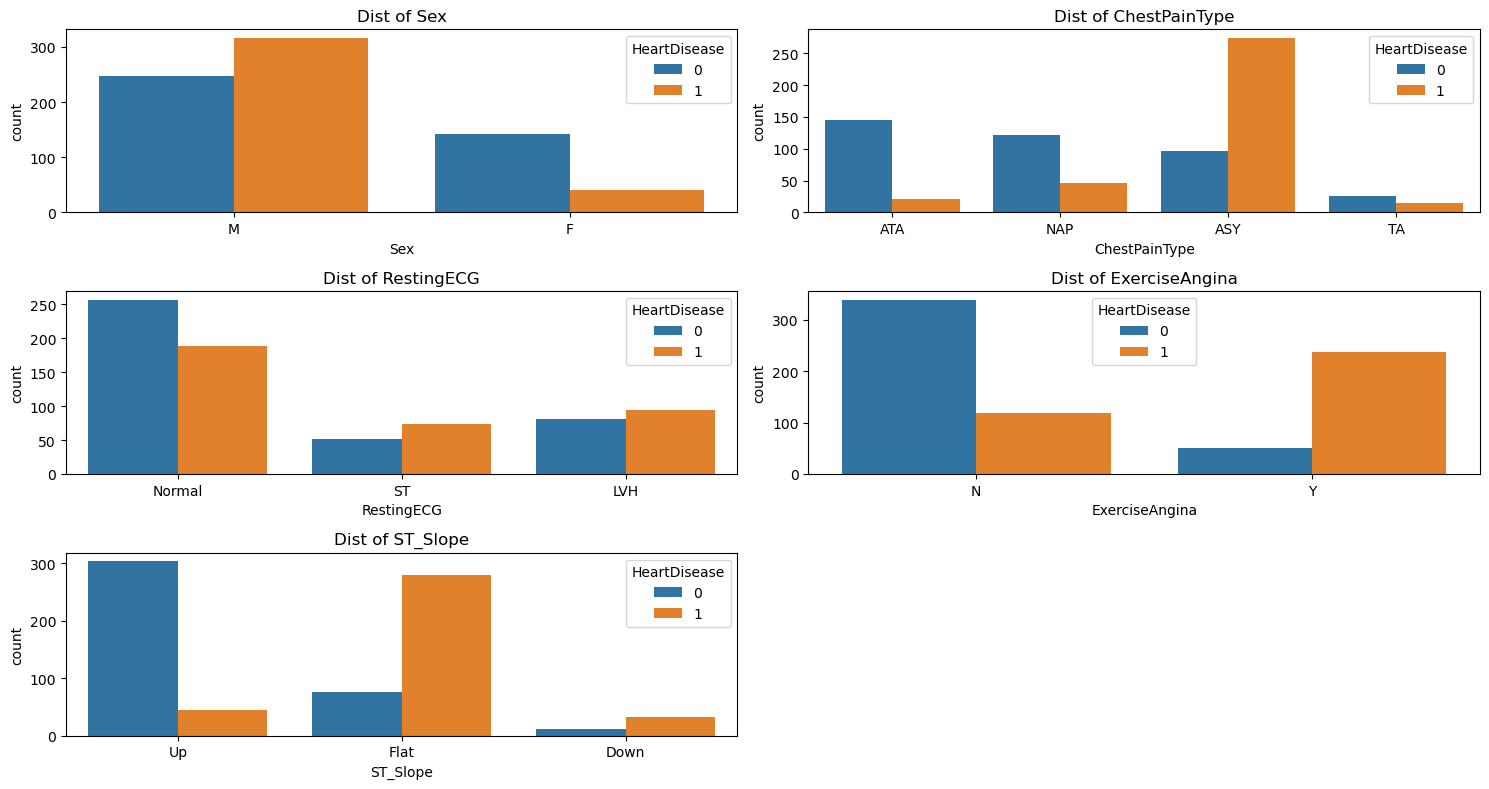

In [ ]:
# Data Distribution with Target

fig , axs = plt.subplots(3,2, figsize=(15,8))
for idx, col in enumerate(cat_cols):
    ax = axs[idx // 2, idx % 2]
    sns.countplot(x=col,hue="HeartDisease", data=heart_df, ax=ax)
    ax.set_title(f"Dist of {col}")
axs[2,1].axis("off")
plt.tight_layout()
plt.show()

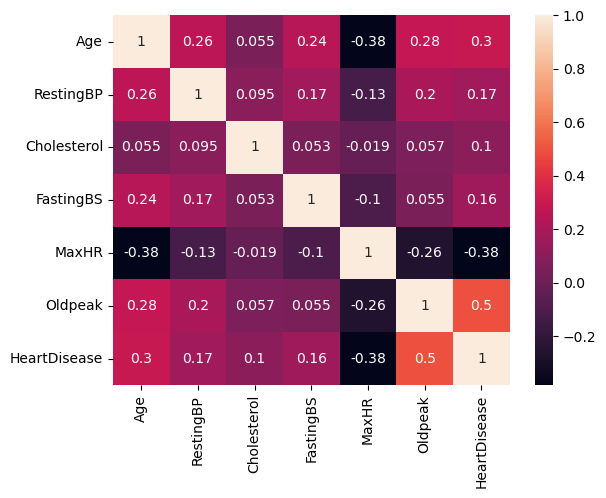

In [ ]:
# Data Correlation
sns.heatmap(heart_df.corr(numeric_only=True), annot=True)
plt.show()

In [36]:
# Make a Copy
heart_df_Pipe = heart_df.copy()

In [37]:
# Categorical Data Encoding
cat_list = cat_cols.columns
OH_enc = OneHotEncoder(drop=None, sparse_output=False)
enc_heart = OH_enc.fit_transform(heart_df[cat_list])
encoded_df = pd.DataFrame(enc_heart, columns=OH_enc.get_feature_names_out(cat_list))
heart_df.drop(cat_list, axis=1, inplace=True)
heart_df = pd.concat([heart_df, encoded_df], axis=1)
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                745 non-null    int64  
 1   RestingBP          745 non-null    int64  
 2   Cholesterol        745 non-null    int64  
 3   FastingBS          745 non-null    int64  
 4   MaxHR              745 non-null    int64  
 5   Oldpeak            745 non-null    float64
 6   HeartDisease       745 non-null    int64  
 7   Sex_F              745 non-null    float64
 8   Sex_M              745 non-null    float64
 9   ChestPainType_ASY  745 non-null    float64
 10  ChestPainType_ATA  745 non-null    float64
 11  ChestPainType_NAP  745 non-null    float64
 12  ChestPainType_TA   745 non-null    float64
 13  RestingECG_LVH     745 non-null    float64
 14  RestingECG_Normal  745 non-null    float64
 15  RestingECG_ST      745 non-null    float64
 16  ExerciseAngina_N   745 non

In [39]:
# Split Data into Features & Target
features = heart_df.drop("HeartDisease", axis=1)
features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
# Target
target = heart_df["HeartDisease"]
target

0      0
1      1
2      0
3      1
4      0
      ..
740    1
741    1
742    1
743    1
744    0
Name: HeartDisease, Length: 745, dtype: int64

In [41]:
# Split Data into Train & Test
xtrain , xtest, ytrain, ytest = train_test_split(features, target, stratify=target, test_size=0.2, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(596, 20) (149, 20) (596,) (149,)


In [42]:
# Scale Data
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Models

In [43]:
# Try Different Models
models = {
    "Logistic Regression" :  LogisticRegression(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=42),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "Ada Boost" : AdaBoostClassifier(random_state=42),
    "Gradient Boost" : GradientBoostingClassifier(random_state=42),
    "XGBoost" : xgb.XGBClassifier()
}


models_recall = {}
for name, model in models.items():
    pipeline = Pipeline([("scaler", scaler), ("model", model)])
    cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
    recall = cross_val_score(pipeline, features, target, cv=cv, scoring="recall")
    models_recall[name] = recall.mean()

result = pd.DataFrame(list(models_recall.items()), columns=["Model", "Recall Score"])
print(result.sort_values(by="Recall Score", ascending=False))

                 Model  Recall Score
1                  KNN      0.887559
2                  SVC      0.887520
4        Random Forest      0.867919
7              XGBoost      0.867879
0  Logistic Regression      0.865063
6       Gradient Boost      0.859468
5            Ada Boost      0.842567
3        Decision Tree      0.758333


In [44]:
# Evalation Matrix
def model_evaluation(xtrain_pred, ytrain, model_pred, ytest):
    print("Train Data")
    print(f"Recall: {recall_score(ytrain, xtrain_pred)}")
    print(f"Precision: {precision_score(ytrain, xtrain_pred)}")
    print(f"F1 Score: {f1_score(ytrain, xtrain_pred)}")
    print(f"Acurracy: {accuracy_score(ytrain, xtrain_pred)}")
    print("-"*100)
    print(f"Classification Report: ")
    print(classification_report(ytrain, xtrain_pred))
    print("*"*100)
    print("*"*100)
    print("Test Data")
    print(f"Recall: {recall_score(ytest, model_pred)}")
    print(f"Precision: {precision_score(ytest, model_pred)}")
    print(f"F1 Score: {f1_score(ytest, model_pred)}")
    print(f"Acurracy: {accuracy_score(ytest, model_pred)}")
    print("-"*100)
    print(f"Classification Report: ")
    print(classification_report(ytest, model_pred))
    print("-"*100)

    sns.heatmap(confusion_matrix(ytest, model_pred), annot = True, fmt='d')
    plt.show()

Train Data
Recall: 0.9333333333333333
Precision: 0.8837209302325582
F1 Score: 0.9078498293515358
Acurracy: 0.9093959731543624
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       311
           1       0.88      0.93      0.91       285

    accuracy                           0.91       596
   macro avg       0.91      0.91      0.91       596
weighted avg       0.91      0.91      0.91       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8309859154929577
Precision: 0.8676470588235294
F1 Score: 0.8489208633093526
Acurracy: 0.8590604026845637
-----------------------------------------------------------------------------------------------

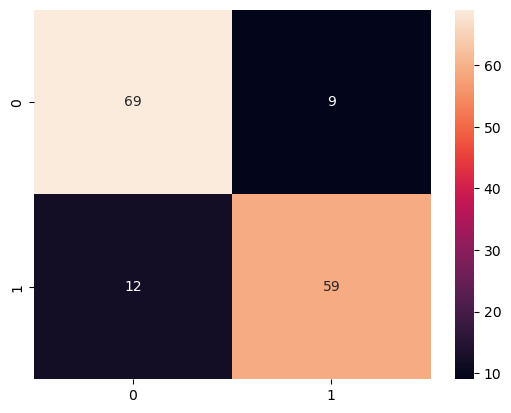

In [45]:
# SVC
svc_model = SVC( random_state=42)
svc_model.fit(xtrain_scaled, ytrain)
xtrain_pred = svc_model.predict(xtrain_scaled)
svc_pred = svc_model.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, svc_pred, ytest)

In [126]:
# SVC Tuning
parameters = {
    "kernel" : ["rbf", "poly", "linear"],
    "C" : [0.01, 1, 10],
    "gamma" : [0.01, 1, 10],
    "degree" : [1,2]
    
}

grid_svc = GridSearchCV(SVC(random_state=42), parameters, cv=5, scoring='recall', n_jobs=-1)
grid_svc.fit(xtrain_scaled, ytrain)

print("Best parameters for SVC:", grid_svc.best_params_)
print("Best score for SVC:", grid_svc.best_score_)

Best parameters for SVC: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best score for SVC: 0.8912280701754387


Train Data
Recall: 0.9122807017543859
Precision: 0.858085808580858
F1 Score: 0.8843537414965986
Acurracy: 0.8859060402684564
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       311
           1       0.86      0.91      0.88       285

    accuracy                           0.89       596
   macro avg       0.89      0.89      0.89       596
weighted avg       0.89      0.89      0.89       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8309859154929577
Precision: 0.8676470588235294
F1 Score: 0.8489208633093526
Acurracy: 0.8590604026845637
------------------------------------------------------------------------------------------------

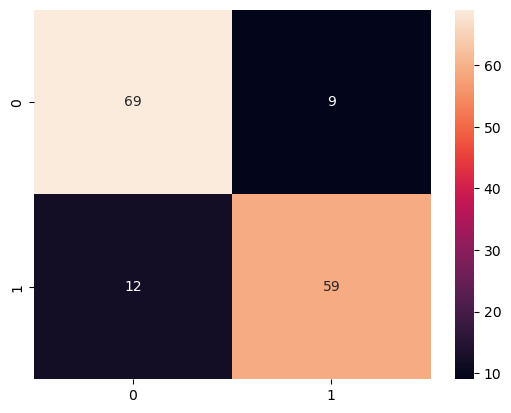

In [46]:
# Tuned SVC
svc_model1 = SVC(C=1,degree=1, gamma=0.01, kernel="rbf",  random_state=42)
svc_model1.fit(xtrain_scaled, ytrain)
xtrain_pred = svc_model1.predict(xtrain_scaled)
svc_pred1 = svc_model1.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, svc_pred1, ytest)

Train Data
Recall: 0.968421052631579
Precision: 0.9583333333333334
F1 Score: 0.9633507853403142
Acurracy: 0.964765100671141
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       311
           1       0.96      0.97      0.96       285

    accuracy                           0.96       596
   macro avg       0.96      0.96      0.96       596
weighted avg       0.96      0.96      0.96       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8169014084507042
Precision: 0.8285714285714286
F1 Score: 0.8226950354609929
Acurracy: 0.8322147651006712
-------------------------------------------------------------------------------------------------

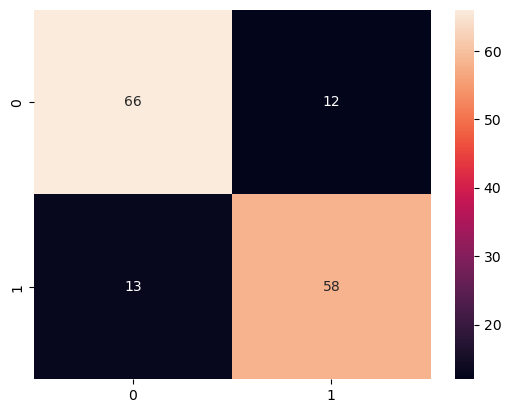

In [47]:
# GradientBoosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(xtrain_scaled, ytrain)
xtrain_pred = gb_model.predict(xtrain_scaled)
y_pred = gb_model.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, y_pred, ytest)

In [129]:
# GradientBoosting Tuning
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5], 
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='recall', n_jobs=-1)
grid_gb.fit(xtrain_scaled, ytrain)

print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Best score for Gradient Boosting:", grid_gb.best_score_)
best_gb = grid_gb.best_estimator_

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}
Best score for Gradient Boosting: 0.8947368421052632


Train Data
Recall: 0.9157894736842105
Precision: 0.8613861386138614
F1 Score: 0.8877551020408163
Acurracy: 0.889261744966443
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       311
           1       0.86      0.92      0.89       285

    accuracy                           0.89       596
   macro avg       0.89      0.89      0.89       596
weighted avg       0.89      0.89      0.89       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8309859154929577
Precision: 0.8428571428571429
F1 Score: 0.8368794326241135
Acurracy: 0.8456375838926175
------------------------------------------------------------------------------------------------

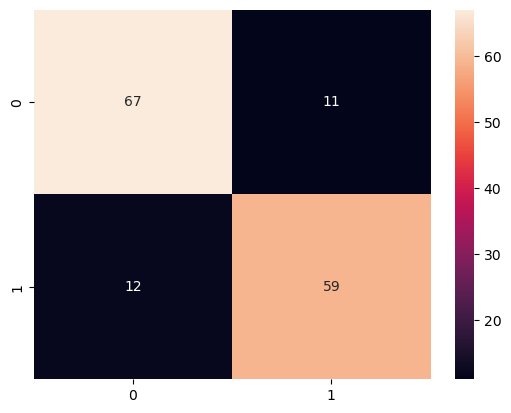

In [48]:
# Tuned Gradient Boost
gb_model1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2,subsample=0.6, random_state=42)
gb_model1.fit(xtrain_scaled, ytrain)
xtrain_pred = gb_model1.predict(xtrain_scaled)
y_pred1 = gb_model1.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, y_pred1, ytest)

Train Data
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
Acurracy: 1.0
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       311
           1       1.00      1.00      1.00       285

    accuracy                           1.00       596
   macro avg       1.00      1.00      1.00       596
weighted avg       1.00      1.00      1.00       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8169014084507042
Precision: 0.8529411764705882
F1 Score: 0.8345323741007195
Acurracy: 0.8456375838926175
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    rec

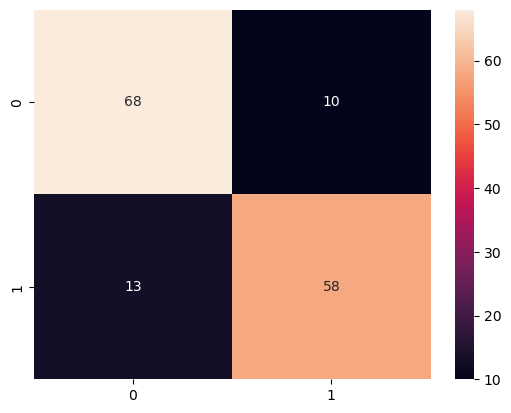

In [49]:
# RandomForest
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(xtrain_scaled, ytrain)
xtrain_pred = RF_model.predict(xtrain_scaled)
RF_pred = RF_model.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, RF_pred, ytest)

In [132]:
# Random Forest

rf = RandomForestClassifier(random_state=42,)
param = {
    "n_estimators" : [50, 100, 150, 200, 250, 300 ] ,
    "criterion" : ["gini", "log_loss", "entropy"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 4, 6, 8],
    "min_samples_leaf" : [1, 2, 3, 4]

}
grid = GridSearchCV(rf, param, cv=5, scoring="recall")
grid.fit(xtrain_scaled, ytrain)
print(f"Random forest best estimator : {grid.best_score_}")
print(f"Random forest best barameters : {grid.best_params_}")

Random forest best estimator : 0.9122807017543859
Random forest best barameters : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Train Data
Recall: 0.9228070175438596
Precision: 0.906896551724138
F1 Score: 0.9147826086956522
Acurracy: 0.9177852348993288
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       311
           1       0.91      0.92      0.91       285

    accuracy                           0.92       596
   macro avg       0.92      0.92      0.92       596
weighted avg       0.92      0.92      0.92       596

****************************************************************************************************
****************************************************************************************************
Test Data
Recall: 0.8169014084507042
Precision: 0.8285714285714286
F1 Score: 0.8226950354609929
Acurracy: 0.8322147651006712
------------------------------------------------------------------------------------------------

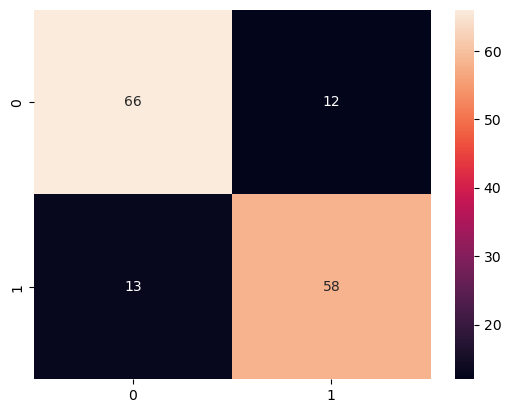

In [50]:
# Tuned RandomForest
RF_model1 = RandomForestClassifier(criterion="gini",n_estimators=100, max_depth=None,  min_samples_leaf=4, min_samples_split=2, random_state=42)
RF_model1.fit(xtrain_scaled, ytrain)
xtrain_pred =RF_model1.predict(xtrain_scaled)
RF_pred1 =RF_model1.predict(xtest_scaled)
model_evaluation(xtrain_pred, ytrain, RF_pred1, ytest)

In [51]:
# Spltit the Copied Data
features2 = heart_df_Pipe.drop("HeartDisease", axis=1)
target2 = heart_df_Pipe["HeartDisease"]
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(features2, target2, test_size=0.2, random_state=42)
print(xtrain2.shape, xtest2.shape, ytrain2.shape, ytest2.shape)

(596, 11) (149, 11) (596,) (149,)


Test Data
Recall: 0.8625
Precision: 0.9452054794520548
F1 Score: 0.9019607843137255
Acurracy: 0.8993288590604027
----------------------------------------------------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        69
           1       0.95      0.86      0.90        80

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.90      0.90      0.90       149

----------------------------------------------------------------------------------------------------


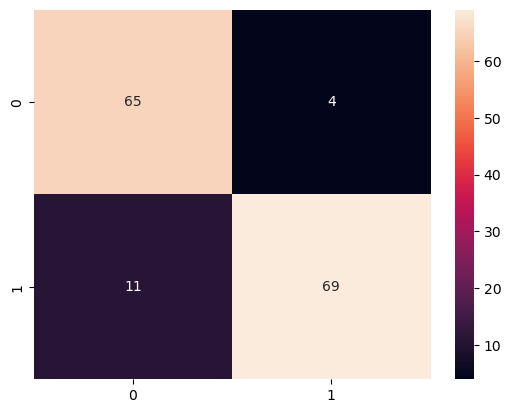

In [52]:
# Create a pipeline with preprocessing and model
cat_cols_2 = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
num_cols_2 = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]

cat_transformer = Pipeline([
    ('OneHotEncoder', OH_enc) ])

preprocessor = ColumnTransformer([
    ('cat', cat_transformer, cat_cols_2),
    ('num', 'passthrough', num_cols_2) 
])
pipeline = Pipeline([
    ("preprocessor" , preprocessor),
    ("global_scaler", scaler),
    ("classifier" , svc_model1)
]) 

pipeline.fit(xtrain2, ytrain2)
y_pred_pipeline = pipeline.predict(xtest2)

print("Test Data")
print(f"Recall: {recall_score(ytest2, y_pred_pipeline)}")
print(f"Precision: {precision_score(ytest2, y_pred_pipeline)}")
print(f"F1 Score: {f1_score(ytest2, y_pred_pipeline)}")
print(f"Acurracy: {accuracy_score(ytest2, y_pred_pipeline)}")
print("-"*100)
print(f"Classification Report: ")
print(classification_report(ytest2, y_pred_pipeline))
print("-"*100)

sns.heatmap(confusion_matrix(  ytest2,y_pred_pipeline), annot = True, fmt='d')
plt.show()



In [53]:
# Save the trained pipeline
import joblib

joblib.dump(pipeline, 'Heart_model_pipeline1.pkl')
print("Model pipeline saved successfully.")

Model pipeline saved successfully.
